# Color Quantization

exploring images with OpenCV (Open Source Computer Vision) library

__challenge:__ working with images from a RESTful JSON API</br>
<a href="https://www.pexels.com">Photos provided by Pexels</a>

## First get some images

For the purposes of comparing image colors, you'll search a free image repository for photos matching two different kinds of music, pop music and punk! 

Purely for research purposes, this decision is based on a hypothesis that punk music photos would contain more dark (and neon?) colors, and of course who doesn't have a soft spot for the pinks or happy colors associated with so called pop music?! I will admit that popular is a pretty vague term, but you are just experimenting.

In [1]:
# # install Pexels API v1 with Python once only, with pip because it's not hosted on anaconda, and quietly in the notebook
# !pip install pexels-api --quiet

In [2]:
# # # optionally, check that your environment variable(s) are active with the env. Don't push this output to a remote repository!
# # !conda env config vars list

In [3]:
# magic command; display plots generated by matplotlib in the IPython shell just below the cell, not in a separate output window
%matplotlib inline
# import modules
import os  # standard Python module for operating system-based tasks like working with file paths
import cv2 as cv  # OpenCV computer vision library used for data clustering, i.e., measuring similarities within color spaces
import numpy as np  # for working with images as numerical arrays
import matplotlib.pyplot as plt  # used to plot or display image data in cartesian 2D space
from urllib.request import urlopen  # for opening URLs
import time as t  # to calculate processing or image conversion time


In [4]:
from pexels_api import API  # import API class from pexels_api package
# load your Pexels API key from a conda variable stored with the activated conda environment
PEXELS_API_KEY = os.environ["MY_KEY"]
# Create API object
api = API(PEXELS_API_KEY)

In [5]:
# search five 'punk' photos
api.search('punk', page=1, results_per_page=5)
# get photo entries (a list of photo objects)
photos_punk = api.get_entries()
# loop the five photos
for photo in photos_punk:
  # print photographer
  print('Photographer: ', photo.photographer)
  # print url
  print('Photo url: ', photo.url)
  # print original size url
  print('Photo original size: ', photo.original)

Photographer:  William Matt
Photo url:  https://www.pexels.com/photo/funky-skull-graffiti-on-locked-roll-down-black-door-953457/
Photo original size:  https://images.pexels.com/photos/953457/pexels-photo-953457.jpeg
Photographer:  Clem Onojeghuo
Photo url:  https://www.pexels.com/photo/man-sitting-on-guitar-amplifier-playing-electric-guitar-375893/
Photo original size:  https://images.pexels.com/photos/375893/pexels-photo-375893.jpeg
Photographer:  Darya Sannikova
Photo url:  https://www.pexels.com/photo/photo-of-woman-sitting-on-stairs-1989836/
Photo original size:  https://images.pexels.com/photos/1989836/pexels-photo-1989836.jpeg
Photographer:  Cheef
Photo url:  https://www.pexels.com/photo/man-covering-his-mouth-2080736/
Photo original size:  https://images.pexels.com/photos/2080736/pexels-photo-2080736.jpeg
Photographer:  Jaime Rivera
Photo url:  https://www.pexels.com/photo/woman-in-black-leather-jacket-3598252/
Photo original size:  https://images.pexels.com/photos/3598252/pexel

In [6]:
# search five 'pop' photos; explicitly include 'music' to avoid bubbles and other images that 'pop'
api.search('pop music', page=1, results_per_page=5)
# get photo entries (a list of photo objects)
photos_pop = api.get_entries()
# loop the five photos
for photo in photos_pop:
  # print photographer
  print('Photographer: ', photo.photographer)
  # print url
  print('Photo url: ', photo.url)
  # print original size url
  print('Photo original size: ', photo.original)

Photographer:  Jacob Morch
Photo url:  https://www.pexels.com/photo/people-inside-dark-room-with-spotlights-426976/
Photo original size:  https://images.pexels.com/photos/426976/pexels-photo-426976.jpeg
Photographer:  mali maeder
Photo url:  https://www.pexels.com/photo/man-playing-pioneer-dj-turntable-219101/
Photo original size:  https://images.pexels.com/photos/219101/pexels-photo-219101.jpeg
Photographer:  Edward Eyer
Photo url:  https://www.pexels.com/photo/man-playing-guitar-811838/
Photo original size:  https://images.pexels.com/photos/811838/pexels-photo-811838.jpeg
Photographer:  Hannah Gibbs
Photo url:  https://www.pexels.com/photo/photo-of-man-holding-microphone-949274/
Photo original size:  https://images.pexels.com/photos/949274/pexels-photo-949274.jpeg
Photographer:  Lucas Allmann
Photo url:  https://www.pexels.com/photo/people-performing-on-stage-442540/
Photo original size:  https://images.pexels.com/photos/442540/pexels-photo-442540.jpeg


#### Skip these next few cells if you want; warning just practice ahead

In [7]:
# optionally, peek the array of photo objects returned from Pexels API (to inspect what's happening)
photos_punk  # or peek at photos_pop


In [8]:
# optionally, print its class; to know what you're working with
print(type(photos_punk))

<class 'list'>


In [9]:
# optionally, to dissect this more, use enumerate() to iterate over the list and show its index and objects explicitly
for index , item in enumerate(photos_punk):
    print(index,item)

0 <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f6d0>
1 <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f220>
2 <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f1c0>
3 <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f760>
4 <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f8e0>


In [10]:
# list comprehension for no reason but practicing python and remembering how lists behave
print([list((i, photos_punk[i])) for i in range(len(photos_punk))])

[[0, <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f6d0>], [1, <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f220>], [2, <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f1c0>], [3, <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f760>], [4, <pexels_api.tools.photo.Photo object at 0x7fe7b8a6f8e0>]]


## Okay, now read the images

So photo objects are not so useful until we can _see_ them! 

If you try to read Pexel images from URL directly to an image using urllib, you will get a 403 forbidden error. I'm guessing that Pexels has forbidden hotlinking directly to its images (although it's not stated in their terms), as this can be a heavy draw on its server. Else, I'm stuck for some other reason.</br>

_So, downloading is one way to go from here. (I'd love to hear about alternatives!)_

In [11]:
# make a function to read an image from its url
def url_to_image(url, readFlag=cv.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then
    # read it into OpenCV format (i.e., decode it)
    resp = urlopen(url)  # open a connection to the url
    image = np.asarray(bytearray(resp.read()), dtype="uint8")  # convert the raw byte-sequence to a one-dimensional NumPy array, i.e., a long list of pixels
    image = cv.imdecode(image, readFlag)  # reshape the array into a 2D format, assuming 3 components per pixel (Red, Green, and Blue components)

    # return the image
    return image


In [12]:
# commented out cell because it's returning HTTPError: HTTP Error 403: Forbidden

# # loop the five photos
# for photo in photos_punk:
#     # download the image from its original size URL and display it
# #     print("downloading %s" % (photo.original))
# #     image = url_to_image(photo.original)  # returns HTTPError: HTTP Error 403: Forbidden
#     print("downloading %s" % (photo.url))
#     image = url_to_image(photo.url)
#     cv.imshow("Image", image)
#     cv.waitKey(0)

### Enter Cloudinary or your favorite media hosting service

I recommend downloading cloudinary with pip as I checked and conda did have a version but it looked to be behind pip's a few updates so better to be up to date to capture any bug and security fixes.
https://pypi.org/project/cloudinary/<br>

You can visit [cloudinary.com](https://cloudinary.com/) to get started for free and get code chunks in python and many other languages also.

In [13]:
# # install cloudinary just once, quiet in the notebook
# !pip install cloudinary --quiet

In [14]:
# get conda environment variables
CLOUDINARY_API_KEY = os.environ["CLOUD_KEY"]
CLOUDINARY_API_SECRET = os.environ["CLOUD_SECRET"]

# Import cloudinary
from cloudinary.uploader import upload
from cloudinary.utils import cloudinary_url
import cloudinary  # added to resolve NameError: name 'cloudinary' is not defined on cloudinary.config()

# Config
cloudinary.config(
  cloud_name = "dtartuanr",  # if you copy code directly from cloudinary.com this should appear as your username (or replace it manually)
  api_key = CLOUDINARY_API_KEY,  # secret; saved as and called from a conda env variable
  api_secret = CLOUDINARY_API_SECRET,  # ditto above
  secure = True
)


In [15]:
# # Upload a test with one of the URLs manually, using the last folder of the URL as its public id
# upload("https://images.pexels.com/photos/426976/pexels-photo-426976.jpeg"
#        , public_id="people-inside-dark-room-with-spotlights-426976"
#        # tag as pop_music for retrieving image later
#        , tag="pop_music"
#        , overwrite = True  # optional; enables overwriting the image upon upload
#       )

# # Transform
# url, options = cloudinary_url("people-inside-dark-room-with-spotlights-426976", width=100, height=150, crop="fill")


### Go check your cloudinary.com media library for the uploaded image

Uploaded images should appear on your Home page.

### Attribute the source and author in the filenames on Cloudinary

Cloudinary doesn't have a separate source or attribution field, or one that I found in my initial research at least, so I've tested what can work in the filename itself and after removing slashes. This seems to be a suitable solution to keep those bits of info with it for experimenting.

Here's an example, from: 
Photographer:  Jacob Morch
Photo url:  https://www.pexels.com/photo/people-inside-dark-room-with-spotlights-426976/
To Cloudinary public_id:
pexels.com-people-inside-dark-room-with-spotlights-426976-Jacob Morch

*_I renamed this test upload file on the website directly._

In [16]:
import re  # regex to use regular expressions to modify strings of text

# test to make concatenated Cloudinary public_id
urls = ['https://www.pexels.com/photo/funky-skull-graffiti-on-locked-roll-down-black-door-953457/']

for url in urls:
    print(format(*url.split('/')[-2:]))

funky-skull-graffiti-on-locked-roll-down-black-door-953457


In [17]:
# loop the five punk photos to make concatenated Cloudinary public_id
for photo in photos_punk:
  # print url
  print(('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer)

funky-skull-graffiti-on-locked-roll-down-black-door-953457-William Matt
man-sitting-on-guitar-amplifier-playing-electric-guitar-375893-Clem Onojeghuo
photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova
man-covering-his-mouth-2080736-Cheef
woman-in-black-leather-jacket-3598252-Jaime Rivera


In [18]:
# output of for loop to a new list for punk photos
photos_punk_ids = []
for photo in photos_punk:
  # print url
  x = ('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer
  photos_punk_ids.append(x)

print(photos_punk_ids)

['funky-skull-graffiti-on-locked-roll-down-black-door-953457-William Matt', 'man-sitting-on-guitar-amplifier-playing-electric-guitar-375893-Clem Onojeghuo', 'photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova', 'man-covering-his-mouth-2080736-Cheef', 'woman-in-black-leather-jacket-3598252-Jaime Rivera']


In [19]:
# output of for loop to a new list for pop photos
photos_pop_ids = []
for photo in photos_pop:
  # print url
  x = ('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer
  photos_pop_ids.append(x)

print(photos_pop_ids)

['people-inside-dark-room-with-spotlights-426976-Jacob Morch', 'man-playing-pioneer-dj-turntable-219101-mali maeder', 'man-playing-guitar-811838-Edward Eyer', 'photo-of-man-holding-microphone-949274-Hannah Gibbs', 'people-performing-on-stage-442540-Lucas Allmann']


### Upload as a batch to Cloudinary

Upon further research, I'd add some details in this step to move this from experiment into a production workflow.
- tagging, (e.g., I go back into the Cloudinary console and add "punk" or "pop-music" manually as tags)
- alt text
- source URLs, and
- maybe also get fancy and upload and organize in subfolders (if that would make the rest of the process cleaner, or see what the tags alone facilitate).

You can read more here about what's possible in the Python SDK: https://cloudinary.com/documentation/django_integration

In [20]:
# # upload punk photos as a for loop
# for photo in photos_punk:
#   # upload from url in list
#   upload(photo.original
#          , public_id=('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer
#          , tag="punk"
#          , overwrite=True
#         )

# # Transform
# url, options = cloudinary_url(('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer, width=100, height=150, crop="fill")


In [21]:
# # upload pop photos as a for loop
# for photo in photos_pop:
#   # upload from url in list
#   upload(photo.original
#          , public_id=('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer
#          , tag="pop_music"
#          , overwrite=True
#         )

# # Transform for now to a uniform layout size (some originated in portrait dimensions or landscape, etc., but this won't distort them)
# url, options = cloudinary_url(('{}-{}'.format(*photo.url.split('/')[-2:])) + photo.photographer, width=100, height=150, crop="fill")


#### Read more about Cloudinary Transformations

https://cloudinary.com/documentation/django_image_manipulation

#### Errors you may encounter

When uploading my first looped punk photos dataset to Cloudinary, I received an "Error: File size too large. Got 14403950. Maximum is 10485760." 

When I went to Cloudinary and checked the upload results, 4 of the 5 images had uploaded. Strangely enough, the one that did not seem to upload this time was the same photo that uploaded in my test successfully when I uploaded it individually with its url as a string directly. 

Maybe there's a way to filter the search for photos through the Pexels API by a maximum file size in the first place... I did not go down that research slide this go around...

So, I recommend trying again or upload what you need to one by one. There's work to be done to try to automate this from start to finish, but as an experiment, just get to the good stuff!

Since I had not yet deleted my original test upload, I had 5 punk images on Cloudinary. 

The looped pop photos uploaded with no errors, and...

Then I went back to the Pexels punk link for the photo that was too large file size, and I manually downloaded the "Large" option locally instead of the "Original" option; I uploaded that manually to Cloudinary and tagged it. So...

Success!

As always, you could test and refine that workflow in a future sprint if it's worthwhile. Probably limiting the # of photos you try uploading at a time would be a constraint (plus your budget there, once you reach the free max!).

## F'ing show the photos already... I'm bored!

example of what the URLs look like now in Cloudinary:</br>
https://res.cloudinary.com/dtartuanr/image/upload/v1676989379/photo-of-woman-sitting-on-stairs-1989836-Darya%20Sannikova.jpg

See this resource about calling Cloudinary images by tag as a JSON list: </br>
https://cloudinary.com/documentation/advanced_url_delivery_options

#### Remember what a single Cloudinary URL looks like for a resource in this list

https://res.cloudinary.com/dtartuanr/image/upload/v1676989379/photo-of-woman-sitting-on-stairs-1989836-Darya%20Sannikova.jpg

_*Note, I use %matplotlib inline called in initial setup cell to plot, i.e., display images in the notebook. This is instead of using cv2 because the window functionalities have failed for me in jupyter notebook regardless of closing commands and whatnot. Plus it's cleaner to see outputs here for me.

OpenCV loads images as numpy arrays and sorts the color of each pixel as BGR color space (blue, green, red).
Matplotlib's plot expects an RGB color model image, so it's necessary to swap those channels to display and interpret the original image correctly. The bytes are reversed between these two models.

In [22]:
# download the image from its URL and give it a variable name
print("downloading %s" % ("photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova"))
img = url_to_image("https://res.cloudinary.com/dtartuanr/image/upload/v1676989379/photo-of-woman-sitting-on-stairs-1989836-Darya%20Sannikova.jpg")


downloading photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova


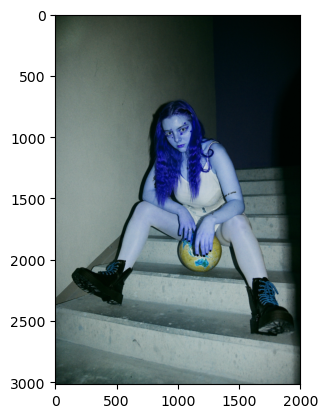

In [23]:
# display the image in the notebook output here with matplotlib.pyplot (%matplotlib-inline is already invoked in setup cell above)
plt.imshow(img)
plt.show()

#### She does look pretty punk but not quite right...

So, this confirms color conversion is necessary (which you will know based on reading the doc of these two libraries (matplotlib and OpenCV) and any other tutorial you can get your on between the two).

In [24]:
# optionally, here's a nice way to list the different conversion function flags available in OpenCV
BGRflags = [flag for flag in dir(cv) if flag.startswith('COLOR_BGR') ]
print(BGRflags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In [25]:
# convert the image from BGR (OpenCV default) to RGB (for matplotlib to display correctly)
t0 = t.time()  # start time
cv_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # converts image color space using the flag COLOR_BGR2RGB
t1 = t.time()  # end time
dt_cv = t1-t0  # calculate processing tim
print("Conversion took %0.5f seconds" % dt_cv)

Conversion took 0.00222 seconds


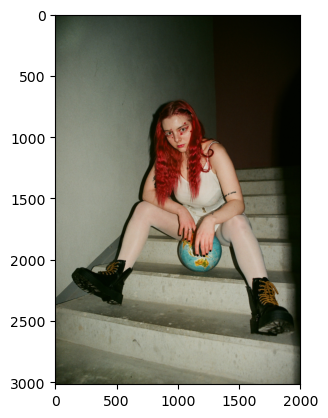

In [26]:
# display the converted image in rgb
plt.imshow(cv_rgb)
plt.show()

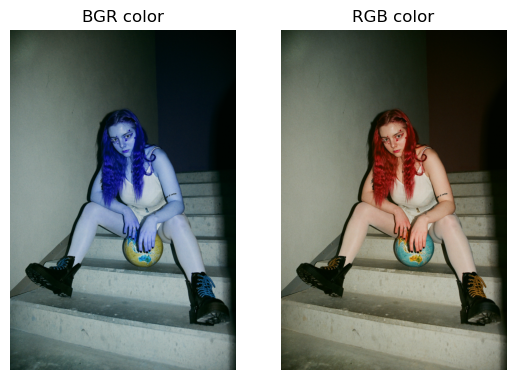

In [27]:
# display images side by side using subplots
plt.subplot(1, 2, 1)  # 1 row, 2 cols, first position
plt.imshow(img)
plt.title('BGR color')
plt.axis('off')  # don't show axis (numbers, ticks)
# plot a subplot for each image you want to show
plt.subplot(1, 2, 2)  # second position
plt.imshow(cv_rgb)
plt.title('RGB color')
plt.axis('off')
# show the subplots
plt.show() 

### Color Quantization

K-means will be used to determine the # of colors to reduce the image to. For each pixel after the clustering, the centroid values (it is also R,G,B) are applied to all pixels, such that resulting image will have that specified number of colors (i.e., K=# of colors in result). Finally, it's necessary to again reshape it back to the shape of the original image to display the result.

Text(0.5, 1.0, 'K=8')

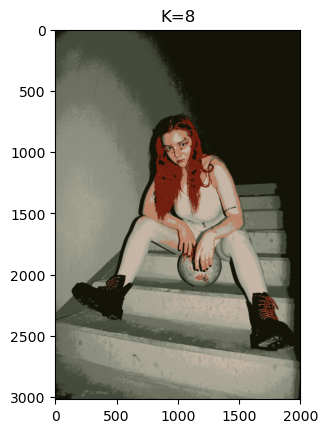

In [28]:
# reshape the image to an array of Mx3 size (M is number of pixels in image) to represent RGB
Z = cv_rgb.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((cv_rgb.shape))
plt.imshow(res2)
plt.title('K=8')

Text(0.5, 1.0, 'K=4')

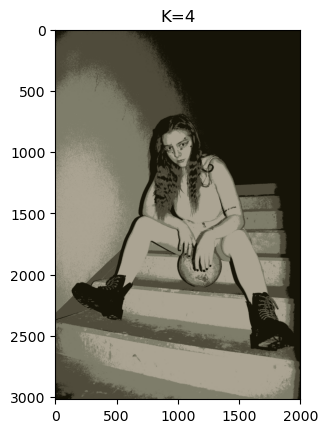

In [29]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2_4 = res.reshape((cv_rgb.shape))
plt.imshow(res2_4)
plt.title('K=4')

Text(0.5, 1.0, 'K=6')

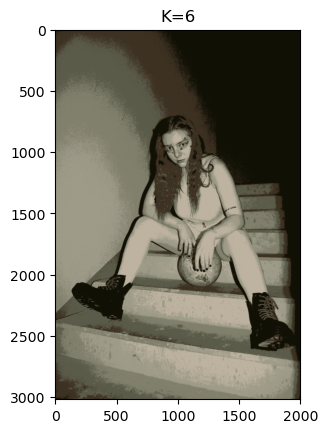

In [30]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2_6 = res.reshape((cv_rgb.shape))
plt.imshow(res2_6)
plt.title('K=6')

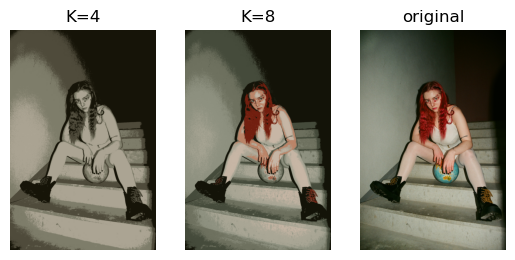

In [31]:
# display images side by side using subplots
# plot a subplot for each image you want to show
plt.subplot(1, 3, 1)  # 1 row, 2 cols, first position
plt.imshow(res2_4)
plt.title('K=4')
plt.axis('off')  # don't show axis (numbers, ticks)
# plot a subplot for each image you want to show
plt.subplot(1, 3, 2)  # second position
plt.imshow(res2)
plt.title('K=8')
plt.axis('off')
# plot a subplot for each image you want to show
plt.subplot(1, 3, 3)  # fourth position
plt.imshow(cv_rgb)
plt.title('original')
plt.axis('off')

# optionally, export figure to image file
!mkdir -p output/img  # Linux/Unix cmd make a subdirectory path from current working directory i.e. folder to hold output images
plt.savefig("output/img/quant_photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova.png")  #save as jpg in subdirectory

# show the subplots
plt.show() 

downloading people-performing-on-stage-442540-Lucas Allmann


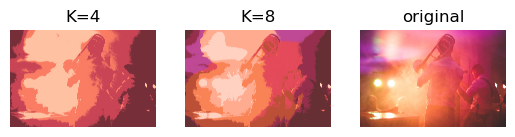

In [32]:
# download another image from its URL, this time from the pop_music images
print("downloading %s" % ("people-performing-on-stage-442540-Lucas Allmann"))
img = url_to_image("https://res.cloudinary.com/dtartuanr/image/upload/v1676989889/people-performing-on-stage-442540-Lucas%20Allmann.jpg")

# convert the image from BGR (OpenCV default) to RGB (for matplotlib to display correctly)
cv_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # converts image color space using the flag COLOR_BGR2RGB

# reshape the image to an array of Mx3 size (M is number of pixels in image) to represent RGB
Z = cv_rgb.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)

# define criteria, 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# define number of clusters(K) 
K = 4
# and apply kmeans()
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2_4 = res.reshape((cv_rgb.shape))

# repeat for 8 clusters
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((cv_rgb.shape))

# display images side by side using subplots
# plot a subplot for each image you want to show
plt.subplot(1, 3, 1)  # 1 row, 2 cols, first position
plt.imshow(res2_4)
plt.title('K=4')
plt.axis('off')  # don't show axis (numbers, ticks)
# plot a subplot for each image you want to show
plt.subplot(1, 3, 2)  # second position
plt.imshow(res2)
plt.title('K=8')
plt.axis('off')
# plot a subplot for each image you want to show
plt.subplot(1, 3, 3)  # fourth position
plt.imshow(cv_rgb)
plt.title('original')
plt.axis('off')
# show the subplots
plt.show() 

#### Trust me, this original image really was that colorful!

First of all, I checked it on Pexels and Cloudinary. This could've been some stage show effects with light and maybe fog machines?! I swear the color is there though in the image I started with.

Here's a glimpse of it side by side, showing what it would look like if you try to read it with matplotlib without converting it from BGR color.

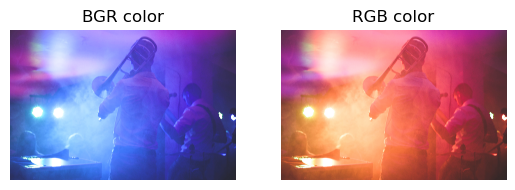

In [33]:
# display images side by side using subplots
plt.subplot(1, 2, 1)  # 1 row, 2 cols, first position
plt.imshow(img)
plt.title('BGR color')
plt.axis('off')  # don't show axis (numbers, ticks)
# plot a subplot for each image you want to show
plt.subplot(1, 2, 2)  # second position
plt.imshow(cv_rgb)
plt.title('RGB color')
plt.axis('off')
# show the subplots
plt.show() 

In [34]:
# write a function to streamline running the color quantization steps
def color_quantization(img, k):
# define input data for clustering
  data = np.float32(image).reshape((-1, 3))
# define criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
# apply cv2.kmeans function
  ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape(img.shape)
  return res2

### What about insights? Why bother with this stuff?

There's known use cases with image size and rendering on different devices where a really wide color space would just not work and make for a bad experience (and seeing alt text perhaps instead of images perhaps).

My interest in this goes a bit further to image analysis. So the next step would be to scale this up and get some insights on:
- comparing punk photos with pop_music photos
- scaling that up

and maybe also...
- color placement (pixel locations and color)
- isolating human figures and color (skin, hair, ...) from anything else (that could really important for insights from image colors, since each is a very different conversation)

### Work with a list of tagged Cloudinary images

In [35]:
# calling a list of URLs with images with the punk tag
# punk = "https://res.cloudinary.com/dtartuanr/image/list/punk.json"
cloudinary_url("punk.json", type="list")

('https://res.cloudinary.com/dtartuanr/image/list/punk.json', {})

In [36]:
# make a tag list url for pop_music images
cloudinary_url("pop_music.json", type="list")

('https://res.cloudinary.com/dtartuanr/image/list/pop_music.json', {})

_*Note: if you paste these url into a browser window you'll see the JSON result._

Or you can view the JSON data response in python here...

In [37]:
# unpack the json to see what you're working with
import json

# store the URL in url as 
# parameter for urlopen
url = 'https://res.cloudinary.com/dtartuanr/image/list/punk.json'
  
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
punk_json = json.loads(response.read())
  
# print the json response
print(punk_json)
 
# here's how you'd read a JSON file
# with open('https://res.cloudinary.com/dtartuanr/image/list/punk.json') as f:
#     punk_json = json.load(f)
type(punk_json)
# Output: dict
punk_json.keys()

{'resources': [{'public_id': 'woman-in-black-leather-jacket-3598252-jaime-rivera-3598252_lut8cr', 'version': 1676995357, 'format': 'jpg', 'width': 1920, 'height': 2880, 'type': 'upload', 'created_at': '2023-02-21T16:02:37Z', 'context': {'custom': {'alt': 'woman in black leather jacket'}}}, {'public_id': 'man-covering-his-mouth-2080736-Cheef', 'version': 1676989380, 'format': 'jpg', 'width': 3376, 'height': 3376, 'type': 'upload', 'created_at': '2023-02-21T14:23:00Z', 'context': {'custom': {'alt': 'man covering his mouth and wearing a black leather jacket'}}}, {'public_id': 'photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova', 'version': 1676989379, 'format': 'jpg', 'width': 2001, 'height': 3017, 'type': 'upload', 'created_at': '2023-02-21T14:22:59Z', 'context': {'custom': {'alt': 'photo of woman sitting on stairs with a globe'}}}, {'public_id': 'man-sitting-on-guitar-amplifier-playing-electric-guitar-375893-Clem Onojeghuo', 'version': 1676989377, 'format': 'jpg', 'width': 2000, '

dict_keys(['resources', 'updated_at'])

In [38]:
# pretty print the list of punk image URL resources
# parsed_json = json.loads(punk_json)  # in this scenario, this step is already taken care of
pretty_json = json.dumps(punk_json, indent=2)

print(pretty_json)

{
  "resources": [
    {
      "public_id": "woman-in-black-leather-jacket-3598252-jaime-rivera-3598252_lut8cr",
      "version": 1676995357,
      "format": "jpg",
      "width": 1920,
      "height": 2880,
      "type": "upload",
      "created_at": "2023-02-21T16:02:37Z",
      "context": {
        "custom": {
          "alt": "woman in black leather jacket"
        }
      }
    },
    {
      "public_id": "man-covering-his-mouth-2080736-Cheef",
      "version": 1676989380,
      "format": "jpg",
      "width": 3376,
      "height": 3376,
      "type": "upload",
      "created_at": "2023-02-21T14:23:00Z",
      "context": {
        "custom": {
          "alt": "man covering his mouth and wearing a black leather jacket"
        }
      }
    },
    {
      "public_id": "photo-of-woman-sitting-on-stairs-1989836-Darya Sannikova",
      "version": 1676989379,
      "format": "jpg",
      "width": 2001,
      "height": 3017,
      "type": "upload",
      "created_at": "2023-02-21T14:22:

## Scratch area for reference code

In [39]:
# # read image as a numpy array from file path
# img_arr = img.imread('/content/sample_image.jpg')
# print(img_arr.shape)

### References: 

#### Pexels API
https://www.pexels.com/api/documentation</br>
https://github.com/AguilarLagunasArturo/pexels-api</br>

#### Cloudinary Python SDK
https://cloudinary.com/documentation/django_integration

#### OpenCV and color handling
https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html</br>
https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab</br>
https://giusedroid.blogspot.com/2015/04/blog-post.html</br>
another option using pillow: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88 (I didn't test this route, but pillow is great for lots of things and this seems as though it would integrate nicely.)<br>